#Micorsoft Movie Business Data Analysis
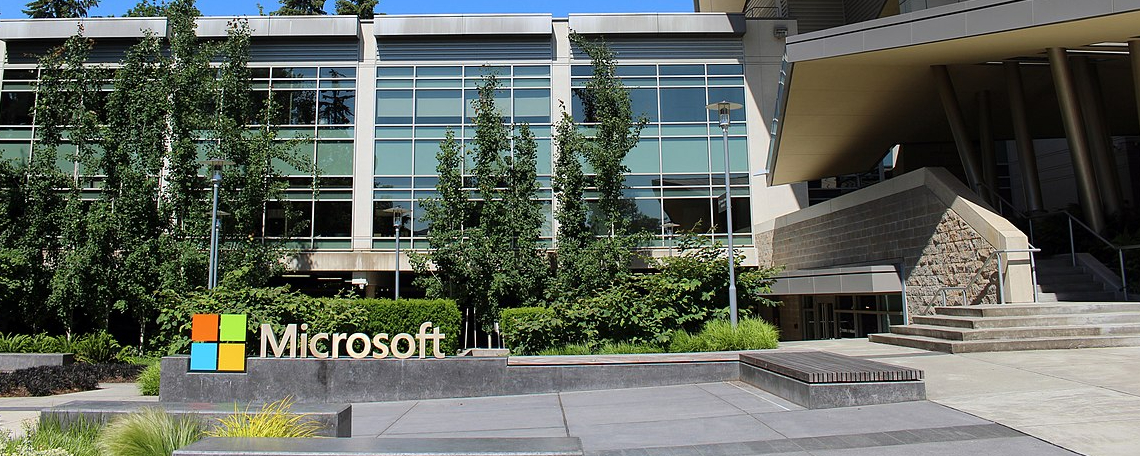

##Overview
Microsoft as tech giant and one of the most successful technology brands of the last 30 years is know for its iconoc Windows operating systems and Office suite of application amongst of other products and service offering for both on-premise and cloud solutions. To add to its numerous service offerings, Microsoft is considering adding cinnematography and movie making. Accordingly, theres need for analysis of the movie industry data to generate insights as the basis for professional recommendations.

Business Proposals
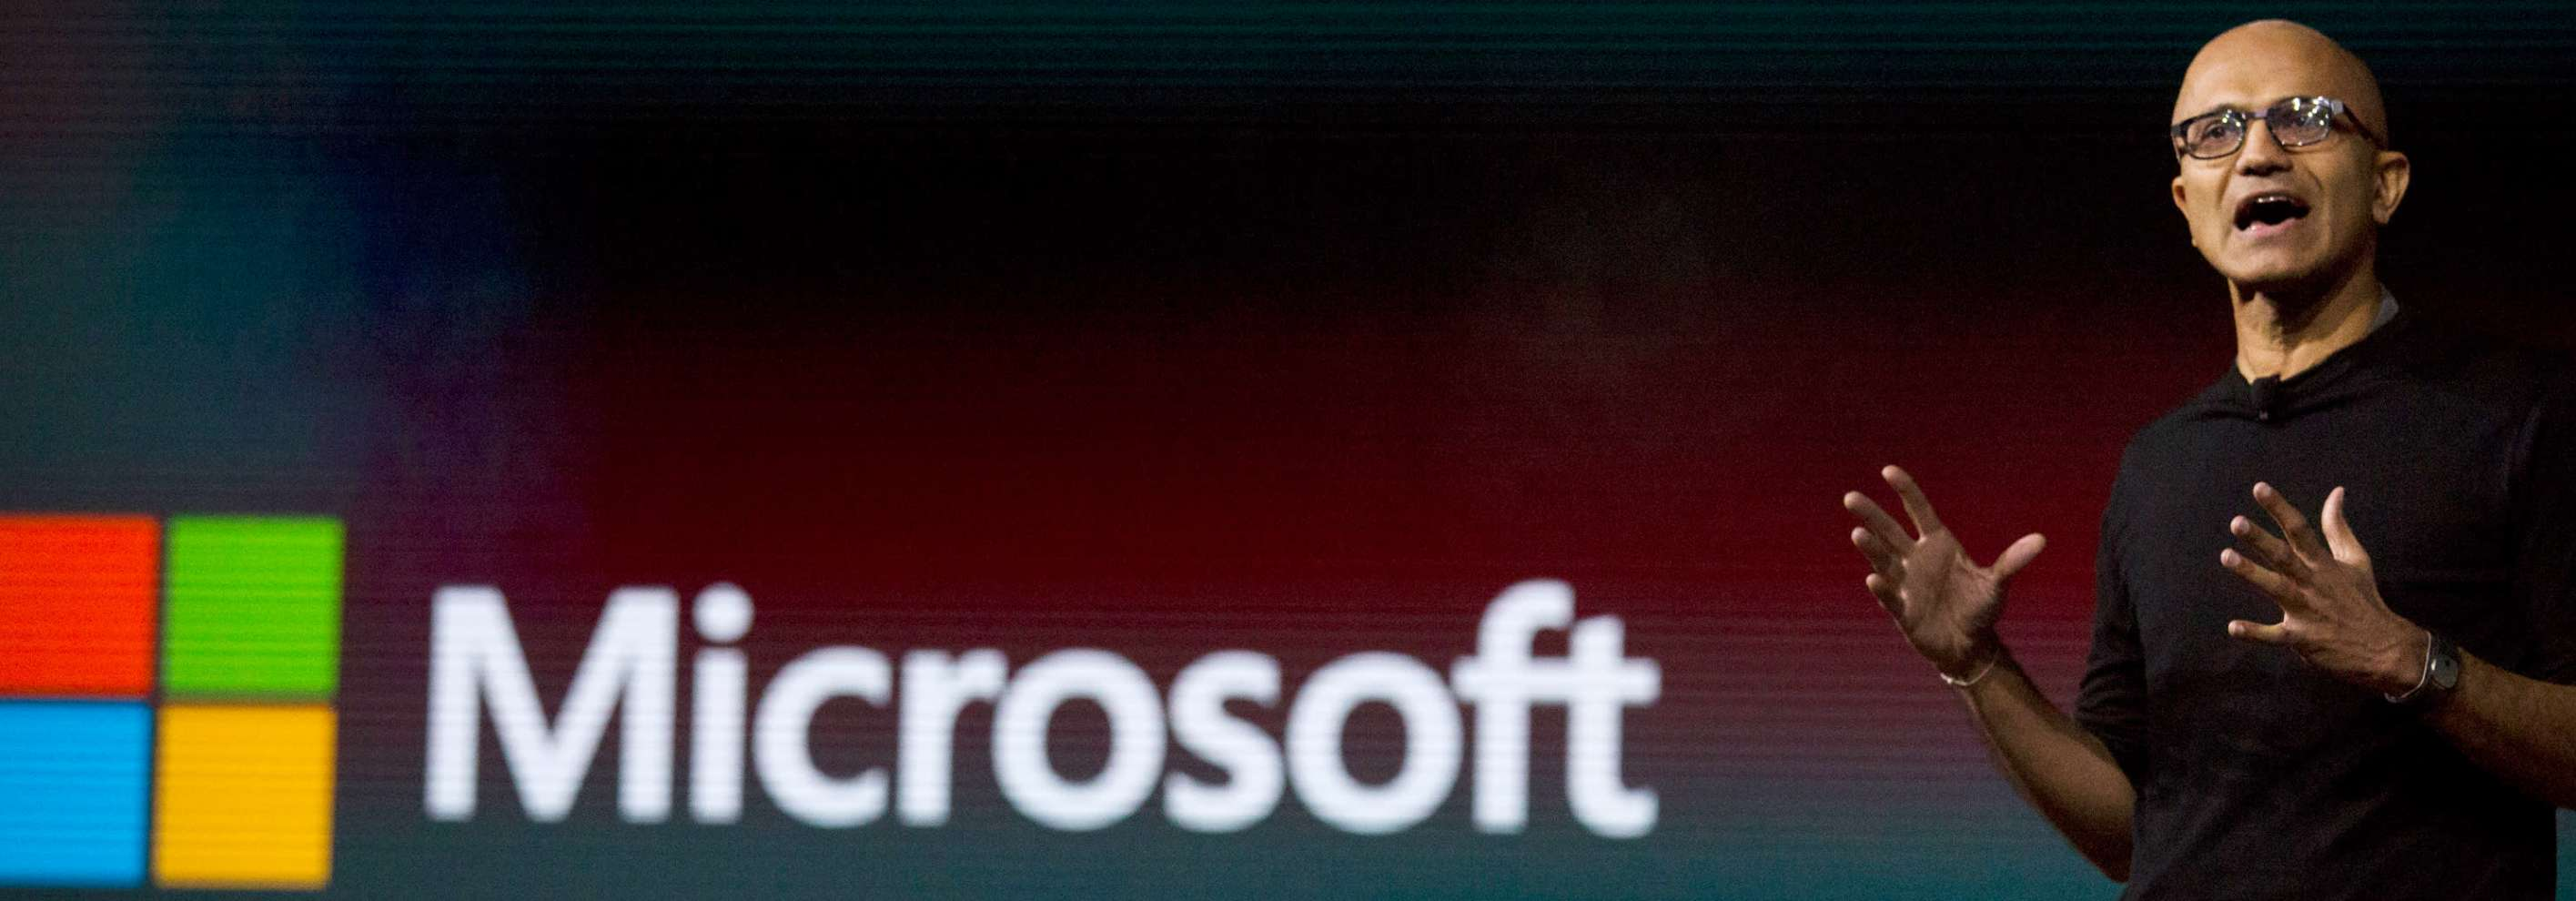
There's need for decision makers at Microsoft to be equiped with facts and figures prior to launching the new movie making business, hence three proposals and recommendations are made as part of this analysis given the provided dataset;

1.   Top studios to consider working with based on gross earnings
2.   Directors to consider working with based on reviews
3.   Relationship between budget and earnings (ROI)





Data Understanding

There are tons of data sources on the movie industry..